In [ ]:
# !wget https://raw.githubusercontent.com/Naxalov/matplotlib/master/scatter/weight-height.csv

--2021-06-24 03:13:08--  https://raw.githubusercontent.com/Naxalov/matplotlib/master/scatter/weight-height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [text/plain]
Saving to: ‘weight-height.csv.1’

weight-height.csv.1 100%[===================>] 418.09K  --.-KB/s    in 0.03s   

2021-06-24 03:13:09 (15.7 MB/s) - ‘weight-height.csv.1’ saved [428120/428120]



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_blobs,make_moons,make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#e63946', '#4cc9f0'])

In [ ]:
data = np.genfromtxt('weight-height.csv', delimiter=',', dtype=str, skip_header=1)

In [ ]:
print(data.shape)

(10000, 3)


In [ ]:
data[6000,0]

'"Female"'

In [ ]:
x = data[:,1:].astype(np.float32)
y = (data[:,0]== '"Male"').astype(np.int)

In [ ]:
print(y[:10])

[1 1 1 1 1 1 1 1 1 1]


<function matplotlib.pyplot.show>

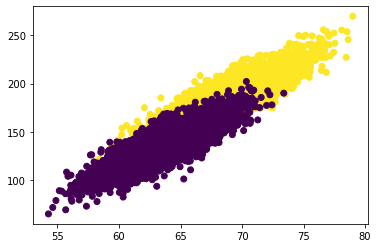

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show

In [ ]:
test_size = 0.5
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train[:10])

(5000, 2)
(5000, 2)
[1 1 0 1 1 0 0 1 1 1]


<function matplotlib.pyplot.show>

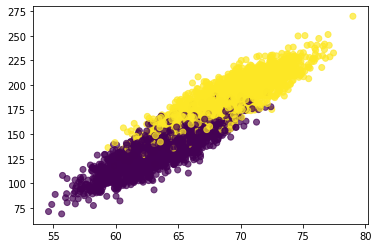

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.7)
plt.show

In [ ]:
model = Sequential()
model.add(layers.Dense(2, input_shape=[2,]))
model.add(layers.Dense(1,  activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
157/157 [==============================] - 1s 3ms/step - loss: 1.6294 - val_loss: 0.2527
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.3196 - val_loss: 0.2491
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2796 - val_loss: 0.2693
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2714 - val_loss: 0.3319
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2494 - val_loss: 0.2267
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2393 - val_loss: 0.8408
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2370 - val_loss: 0.2243
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2464 - val_loss: 0.4109
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2376 - val_loss: 0.2705
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2376 - val_lo

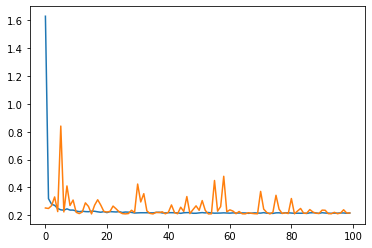

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
print(y_hat[:10])
print(y[:10])

[[0.9954747 ]
 [0.9657504 ]
 [0.9998679 ]
 [0.9963252 ]
 [0.9997146 ]
 [0.3397306 ]
 [0.01176932]
 [0.64582515]
 [0.6515703 ]
 [0.3865716 ]]
[1 1 1 1 1 1 1 1 1 1]


Text(0.5, 1.0, 'original data')

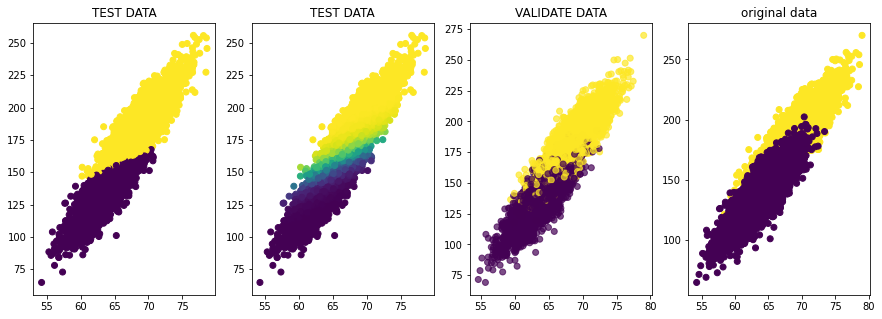

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.scatter(x_test[:,0], x_test[:,1], c=y_hat>.5)
plt.title('TEST DATA')

plt.subplot(1,4,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_hat)
plt.title('TEST DATA')

plt.subplot(1,4,3)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.7)
plt.title('VALIDATE DATA')


plt.subplot(1,4,4)
plt.scatter(x[:,0], x[:,1], c=y)
plt.title('original data')